# CSE 5520 Homework 7

"Visualization of GMM and EM"

| | |
|-|-|
| **Student** | Lynn Pepin ('Tristan Pepin')
|              | tmp13009 / 2079724
| **Due date** | 2021 / Oct / 30 (Sun), 11:59PM
| | ('Sun' should be 'Sat', per HuskyCT due date)

This homework is to help you practice with some data visualization fundamentals.
You are expected to use these visualization techniques and others in your final project.
You are required to do this exercise in Python.

All plots/graphs must have titles and x-y coordinate tick labels. 

In [1]:
# Common imports from Python standard libraries
from dataclasses import dataclass
import math

# Common imports from
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy import stats
from scipy import cluster
from statistics import mean
from sklearn.neighbors import KernelDensity
import sklearn.metrics
from scipy.stats import gaussian_kde
import time
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Useful imports for visualization
import seaborn

# Other packages
import networkx as nx
import pyvis as pv

# Used for Part 1
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go

# Constants
EPS = 0.0000001
FINAL = False

# Some useful functions
def almost_equal(a,b,eps=EPS):
    return abs(a-b) <= eps

# Code provided from HW4
def stdev(X):
    m = mean(X)
    return math.sqrt(sum((x-m)**2 for x in X) / len(X))

def degreesOfFreedom(X, Y):
    s1 = (stdev(X)**2)
    s2 = (stdev(Y)**2)
    df = (s1 / len(X) + s2 / len(Y))**2 / ((s1 / len(X))**2 / (len(X) - 1) + (s2 / len(Y))**2 /
(len(Y) - 1))
    return(df)

# Part 1: K-means and GMM

You need to use your own data to do the problems and you can include your solution or its extended version as part of your proposal/final presentation.


In [2]:
df = pd.read_csv("../DATASETS/US_Accidents_Dec20_updated.csv")

Text(0, 0.5, 'Latitude')

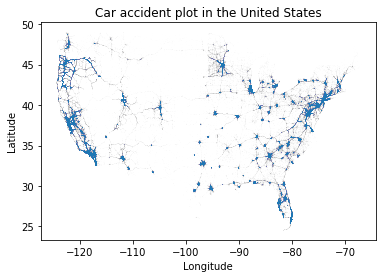

In [3]:

plt.scatter(df["Start_Lng"], df["Start_Lat"], s=0.01, alpha=0.01)

plt.title("Car accident plot in the United States")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [6]:
# Data prep
data = np.array([df["Start_Lng"], df["Start_Lat"]]).T

def get_sample(array, n_samples = 15161):
    indices = np.random.choice(list(range(len(array))), size=n_samples)
    return array[indices]

some_data = get_sample(data)

FI = (1 + 5**.5)/2 # golden ratio

get_hues = lambda ii : colors.hsv_to_rgb(
    (
    (FI * ii) % 1,   # hue
    1.0,
    0.5
    )
)

hues = [get_hues(ii) for ii in range(300)]

In [10]:
# data prep
data = np.array([df["Start_Lng"], df["Start_Lat"]]).T

def get_sample(array, n_samples = 15161):
    indices = np.random.choice(list(range(len(array))), size=n_samples)
    return array[indices]

some_data = get_sample(data)
print(some_data.shape)

FI = (1 + 5**.5)/2 # golden ratio

# get hues, per an old favorite
# https://gamedev.stackexchange.com/questions/46463/how-can-i-find-an-optimum-set-of-colors-for-10-players
get_hues = lambda ii : colors.hsv_to_rgb(
    (
    (FI * ii) % 1,   # hue
    1.0,
    0.5
    )
)

# Precompute hues for convenience
hues = [get_hues(ii) for ii in range(300)]

(15161, 2)


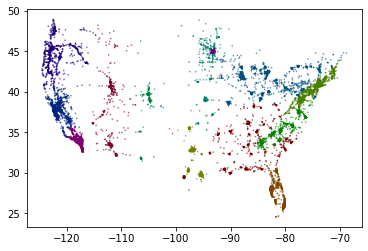

In [11]:
# for k = 13
K_CLUSTERS = 13

gmm = GaussianMixture(n_components = K_CLUSTERS)
gmm.fit(some_data)
labels = gmm.predict(some_data)

rgb_colors = [hues[index) for index in labels]

plt.scatter(
    some_data[:,0],
    some_data[:,1],
    c=rgb_colors,
    s=0.5,
    alpha=0.5
)

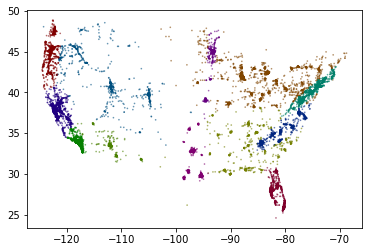

In [10]:
# for k = 12
K_CLUSTERS = 12

gmm = GaussianMixture(n_components = K_CLUSTERS)
gmm.fit(some_data)
labels = gmm.predict(some_data)

rgb_colors = [hues[index] for index in labels]

plt.scatter(
    some_data[:,0],
    some_data[:,1],
    c=rgb_colors,
    s=0.5,
    alpha=0.5
)

# Dashboard

TODO:

1. Find a way to efficiently plot all data
2. Find a way to plot state lines, and allow clicking to go to per-state graph
3. Plot K-means colors
4. Preserve aspect ratio

Also:

1. Two dashboards on one page
2. Fix the KDE estimation
3. ...

> Unfortunately, I have been unable to connect to the campus through VPN, and I have started this homework from home.
> 
> But, I self-host several Linux servers and publish my own webpages! I am very familiar with web-hosting, dealing with ports, Nginx reverse-proxy, etc.
>
> So, this part should be "easy" for me, please do not worry! I can do this part (once I am on campus...)


In [20]:
x = some_data[:,0]
y = some_data[:,1]


55.71631000000001 24.272705000000002


In [ ]:
app = dash.Dash(name="Plot means")

fig = px.scatter(
    x = some_data[:,0],
    y = some_data[:,1]
)

app.layout = html.Div(
    [
        #html.Div(
        #    [
        #        html.P("K-Means plot of "),
        #        dcc.RadioItems(
        #            id = "bandwidth",
        #            options = [{'value' : x, 'label' : x} for x in bandwidths],
        #            value = [0.3],
        #            labelStyle = {'display' : 'inline-block'}
        #        )
        #    ]
        #),
        dcc.Graph(
            id = "plot",
            figure=fig
        )
    ],
    style = {'width': '100%', 'display': 'inline-block'}
)
'''
@app.callback(
    Output("plot", "figure"),
    [Input("bandwidth", "value")]
)
def display_histogram(bandwidth=0.3):
    fig = px.line(
        x=Xs,
        y=all_Ys[bandwidth],
        title = f"KDE of accidents with bandwidth {bandwidth:.2f}"
    )
    return fig
'''
app.run_server(port=12346, debug=False)

Dash is running on http://127.0.0.1:12346/

Dash is running on http://127.0.0.1:12346/

Dash is running on http://127.0.0.1:12346/

Dash is running on http://127.0.0.1:12346/

Dash is running on http://127.0.0.1:12346/

Dash is running on http://127.0.0.1:12346/

Dash is running on http://127.0.0.1:12346/

Dash is running on http://127.0.0.1:12346/

 * Serving Flask app 'Plot means' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:12346/ (Press CTRL+C to quit)
127.0.0.1 - - [03/Nov/2021 16:45:32] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:45:32] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:45:32] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:45:32] "GET /_favicon.ico?v=2.0.0 HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:45:32] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:45:32] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:51:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:51:52] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:51:52] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:51:52] "GET /_favicon.ico?v=2.0.0 HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:51:52] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:51:52] "